In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
import sqlite3

In [21]:
import matplotlib.pyplot as plt

In [46]:
import numpy as np

In [3]:
root_dir = os.path.join("drive","MyDrive","courses","cs685","project","rat-sql")

In [4]:
!pip install asdl~=0.1.5 astor~=0.8.1 attrs~=18.2.0 babel~=2.7.0 bpemb~=0.2.11 cython~=0.29.1 jsonnet~=0.14.0 networkx~=2.2 nltk~=3.4 
!pip install numpy~=1.16 pyrsistent~=0.14.9 pytest~=5.3.2 records~=0.5.3 tabulate~=0.8.6 tqdm~=4.48.0
!pip install transformers -U 
!pip install sciket-learn
!pip install ent entmax stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.3/253.3 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.4 MB/s eta 0:00:00
  Created wheel for asdl: filename=asdl-0.1.5-py3-none-any.whl size=9909 sha256=d8a440bd003143df01ccbbeffb641887e86665e733a748ca14156166c8adade9
  Stored in directory: /root/.cache/pip/wheels/7c/7a/2e/e50b21d4eea8b81b075a77d52c07483ba81e7f2ce90f1e0c81
  Created wheel for jsonnet: filename=jsonnet-0.14.0-cp310-cp310-linux_x86_64.whl size=5432884 sha256=45571d3084ad476a0670e5993f2a0ec39b16a1c0d7604c74d257e0b8453883d9
  Stored in directory: /root/.cache/pip/wheels/33/c8/49/6683591edbdba8b377b217fc1

In [5]:
import torch
print(torch.__version__)

2.0.0+cu118


In [36]:
import stanza

In [6]:
from transformers import RobertaModel,RobertaTokenizer 

import nltk

nltk.download('punkt')
nltk.download('stopwords')
model = RobertaModel.from_pretrained('roberta-large')
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
os.chdir(root_dir)

In [9]:
import json
import os
import _jsonnet
from ratsql.commands.infer import Inferer
from ratsql.datasets.spider import SpiderItem
from ratsql.utils import registry
import torch


In [10]:
exp_config_path = os.path.join(os.getcwd(),"experiments/spider-bert-run.jsonnet")
model_dir = os.path.join(os.getcwd(),"logdir","bert_run","bs=4,lr=1.0e-04,bert_lr=1.0e-05,end_lr=0e0,att=1")
print("model_dir={}".format(model_dir))
print("check if path exists = {}".format(os.path.exists(model_dir)))
checkpoint_step = 33100

model_dir=/content/drive/MyDrive/courses/cs685/project/rat-sql/logdir/bert_run/bs=4,lr=1.0e-04,bert_lr=1.0e-05,end_lr=0e0,att=1
check if path exists = True


In [11]:
root_dir = os.getcwd()
exp_config = json.loads(_jsonnet.evaluate_file(exp_config_path))
model_config_path = os.path.join(root_dir, exp_config["model_config"])
model_config_args = exp_config.get("model_config_args")
infer_config = json.loads(_jsonnet.evaluate_file(model_config_path, tla_codes={'args': json.dumps(model_config_args)}))
print(" ### INFER CONFIG ###")
print(infer_config)

inferer = Inferer(infer_config)
inferer.device = torch.device("cpu")
model = inferer.load_model(model_dir, checkpoint_step)
dataset = registry.construct('dataset', inferer.config['data']['val'])
print(" ######### DATASET #######")
print(dataset)

for id, schema in dataset.schemas.items():
    model.preproc.enc_preproc._preprocess_schema(schema)

 ### INFER CONFIG ###
{'data': {'train': {'db_path': 'data/spider/database', 'name': 'spider', 'paths': ['data/spider/train_spider.json', 'data/spider/train_others.json'], 'tables_paths': ['data/spider/tables.json']}, 'val': {'db_path': 'data/spider/database', 'name': 'spider', 'paths': ['data/spider/dev.json'], 'tables_paths': ['data/spider/tables.json']}}, 'log': {'reopen_to_flush': True}, 'lr_scheduler': {'decay_steps': 35000, 'end_lr': 0, 'name': 'bert_warmup_polynomial_group', 'num_warmup_steps': 5000, 'power': 0.5, 'start_lr': 0.001, 'start_lrs': [0.0001, 1e-05]}, 'model': {'decoder': {'desc_attn': 'mha', 'dropout': 0.20687225956012834, 'enc_recurrent_size': 1024, 'loss_type': 'softmax', 'name': 'NL2Code', 'recurrent_size': 512, 'use_align_loss': True, 'use_align_mat': True}, 'decoder_preproc': {'grammar': {'clause_order': None, 'end_with_from': True, 'factorize_sketch': 2, 'include_literals': True, 'infer_from_conditions': True, 'name': 'spider', 'output_from': True, 'use_table_

WARNING <class 'ratsql.models.enc_dec.EncDecModel.Preproc'>: superfluous {'name': 'EncDec'}
WARNING <class 'ratsql.models.enc_dec.EncDecModel'>: superfluous {'decoder_preproc': {'grammar': {'clause_order': None, 'end_with_from': True, 'factorize_sketch': 2, 'include_literals': True, 'infer_from_conditions': True, 'name': 'spider', 'output_from': True, 'use_table_pointer': True}, 'save_path': 'data/spider/nl2code,output_from=true,fs=2,emb=bert,cvlink', 'use_seq_elem_rules': True}, 'encoder_preproc': {'bert_version': 'roberta-large', 'compute_cv_link': True, 'compute_sc_link': True, 'db_path': 'data/spider/database', 'fix_issue_16_primary_keys': True, 'include_table_name_in_column': False, 'save_path': 'data/spider/nl2code,output_from=true,fs=2,emb=bert,cvlink'}}
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.l

Loading model from /content/drive/MyDrive/courses/cs685/project/rat-sql/logdir/bert_run/bs=4,lr=1.0e-04,bert_lr=1.0e-05,end_lr=0e0,att=1/model_checkpoint-00033100
{'model': EncDecModel(
  (encoder): SpiderEncoderBert(
    (encs_update): RelationalTransformerUpdate(
      (encoder): Encoder(
        (layers): ModuleList(
          (0-7): 8 x EncoderLayer(
            (self_attn): MultiHeadedAttentionWithRelations(
              (linears): ModuleList(
                (0-3): 4 x Linear(in_features=1024, out_features=1024, bias=True)
              )
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (feed_forward): PositionwiseFeedForward(
              (w_1): Linear(in_features=1024, out_features=4096, bias=True)
              (w_2): Linear(in_features=4096, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (sublayer): ModuleList(
              (0-1): 2 x SublayerConnection(
                (norm): 

DB connections: 100%|██████████| 166/166 [01:35<00:00,  1.73it/s]
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


 ######### DATASET #######


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma


INFO:stanza:Done loading processors!


In [15]:
def question(q, db_id):
    spider_schema = dataset.schemas[db_id]
    colMap = {}
    data_item = SpiderItem(
        text=None,  # intentionally None -- should be ignored when the tokenizer is set correctly
        code=None,
        schema=spider_schema,
        orig_schema=spider_schema.orig,
        orig={"question": q}
    )
    model.preproc.clear_items()
    enc_input = model.preproc.enc_preproc.preprocess_item(data_item, None)
    preproc_data = enc_input, None
    with torch.no_grad():
        m2c_align_mat, m2t_align_mat = None, None
        res, m2c_align_mat, m2t_align_mat  = inferer._infer_one(model, data_item, preproc_data, beam_size=1, use_heuristic=True)
        return res, m2c_align_mat, m2t_align_mat, spider_schema, data_item

In [16]:
ques, db_id = "For the cars with 4 cylinders, which model has the largest horsepower?", "car_1"
res, m2c_align_mat, m2t_align_mat, spider_schema, data_item = question(ques, db_id)
print("")
print("")
print(f"For natural language question: {ques} (asked in db_id {db_id})")
print("")
print(f"result code: {res}")
print("")
# print(f"m2c_align_mat.size()={m2c_align_mat.size()}")
# print("")
# print(f"m2t_align_mat.size()={m2t_align_mat.size()}")



For natural language question: For the cars with 4 cylinders, which model has the largest horsepower? (asked in db_id car_1)

result code: [{'orig_question': 'For the cars with 4 cylinders, which model has the largest horsepower?', 'model_output': {'_type': 'sql', 'select': {'_type': 'select', 'is_distinct': False, 'aggs': [{'_type': 'agg', 'agg_id': {'_type': 'NoneAggOp'}, 'val_unit': {'_type': 'Column', 'col_unit1': {'_type': 'col_unit', 'agg_id': {'_type': 'NoneAggOp'}, 'col_id': 12, 'is_distinct': False}}}]}, 'sql_where': {'_type': 'sql_where', 'where': {'_type': 'Eq', 'val_unit': {'_type': 'Column', 'col_unit1': {'_type': 'col_unit', 'agg_id': {'_type': 'NoneAggOp'}, 'col_id': 18, 'is_distinct': False}}, 'val1': {'_type': 'Terminal'}}}, 'sql_groupby': {'_type': 'sql_groupby'}, 'sql_orderby': {'_type': 'sql_orderby', 'order_by': {'_type': 'order_by', 'order': {'_type': 'Desc'}, 'val_units': [{'_type': 'Column', 'col_unit1': {'_type': 'col_unit', 'agg_id': {'_type': 'NoneAggOp'}, 

In [26]:
print(m2c_align_mat.size())
print(m2t_align_mat.size())

torch.Size([44, 24])
torch.Size([44, 6])


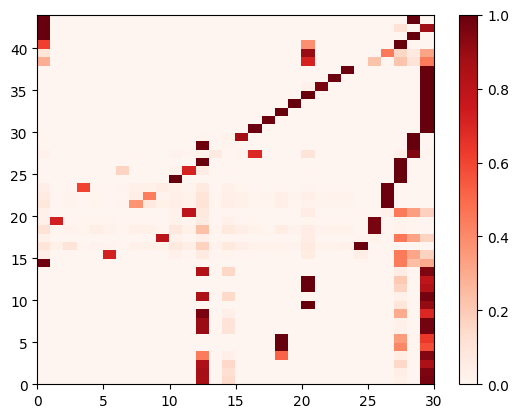

In [27]:
align_mat = torch.cat((m2c_align_mat, m2t_align_mat),1)
fig, ax = plt.subplots()
# Set the colormap
cmap = plt.cm.Reds
# Create a heatmap
heatmap = ax.pcolor(align_mat, cmap=cmap)
plt.colorbar(heatmap)

In [68]:
def generate_alignment_matrix_viz_spider(m2c_align_mat, m2t_align_mat, nl_tokens, schema_list):
    align_mat = torch.cat((m2c_align_mat, m2t_align_mat),1)
    n, m = len(nl_tokens), len(schema_list)
    align_mat = align_mat[:n,:]
    align_mat = align_mat.cpu().detach().numpy()
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(15, 8))
    #fig, ax = plt.subplots()

    # Set the colormap
    cmap = plt.cm.Reds

    # Create a heatmap
    heatmap = ax.pcolor(align_mat, cmap=cmap)

    # Set the ticks and labels
    # reverse the order of yaxis labels
    ytick_labels = nl_tokens
    xtick_labels = schema_list
    yticks = np.arange(0.5, len(ytick_labels), 1)
    xticks = np.arange(0.5, len(xtick_labels), 1)
    
    ax.set_xticks(xticks, minor=False)
    ax.set_xticklabels(xtick_labels, minor=False, rotation=45, ha='right')
    ax.set_yticks(yticks, minor=False)
    ax.set_yticklabels(ytick_labels, minor=False)

    # Add the colorbar
    plt.colorbar(heatmap)

    # Set the title and axis labels
    plt.title('Alignment Matrix')
    # plt.xlabel('Columns')
    # plt.ylabel('Tokens')

    #plt.savefig("sample.png")
    plt.show()

In [69]:
list_tables = []
list_cols = ["column:*"]
for table in spider_schema.tables:
  table_name = table.orig_name
  list_tables.append(table_name)
  for col in table.columns:
    list_cols.append(f"column:{table_name}.{col.orig_name}")
print(list_cols + list_tables)  

['column:*', 'column:continents.ContId', 'column:continents.Continent', 'column:countries.CountryId', 'column:countries.CountryName', 'column:countries.Continent', 'column:car_makers.Id', 'column:car_makers.Maker', 'column:car_makers.FullName', 'column:car_makers.Country', 'column:model_list.ModelId', 'column:model_list.Maker', 'column:model_list.Model', 'column:car_names.MakeId', 'column:car_names.Model', 'column:car_names.Make', 'column:cars_data.Id', 'column:cars_data.MPG', 'column:cars_data.Cylinders', 'column:cars_data.Edispl', 'column:cars_data.Horsepower', 'column:cars_data.Weight', 'column:cars_data.Accelerate', 'column:cars_data.Year', 'continents', 'countries', 'car_makers', 'model_list', 'car_names', 'cars_data']


In [70]:
tokenizer_ques = stanza.Pipeline(lang="en", processors="tokenize")
doc = tokenizer_ques(ques)
nl_tokens = []
print(type(doc.sentences[0]))
for token_kv in doc.sentences[0].tokens:
  nl_tokens.append(token_kv.text)
print(nl_tokens)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Done loading processors!



<class 'stanza.models.common.doc.Sentence'>
['For', 'the', 'cars', 'with', '4', 'cylinders', ',', 'which', 'model', 'has', 'the', 'largest', 'horsepower', '?']


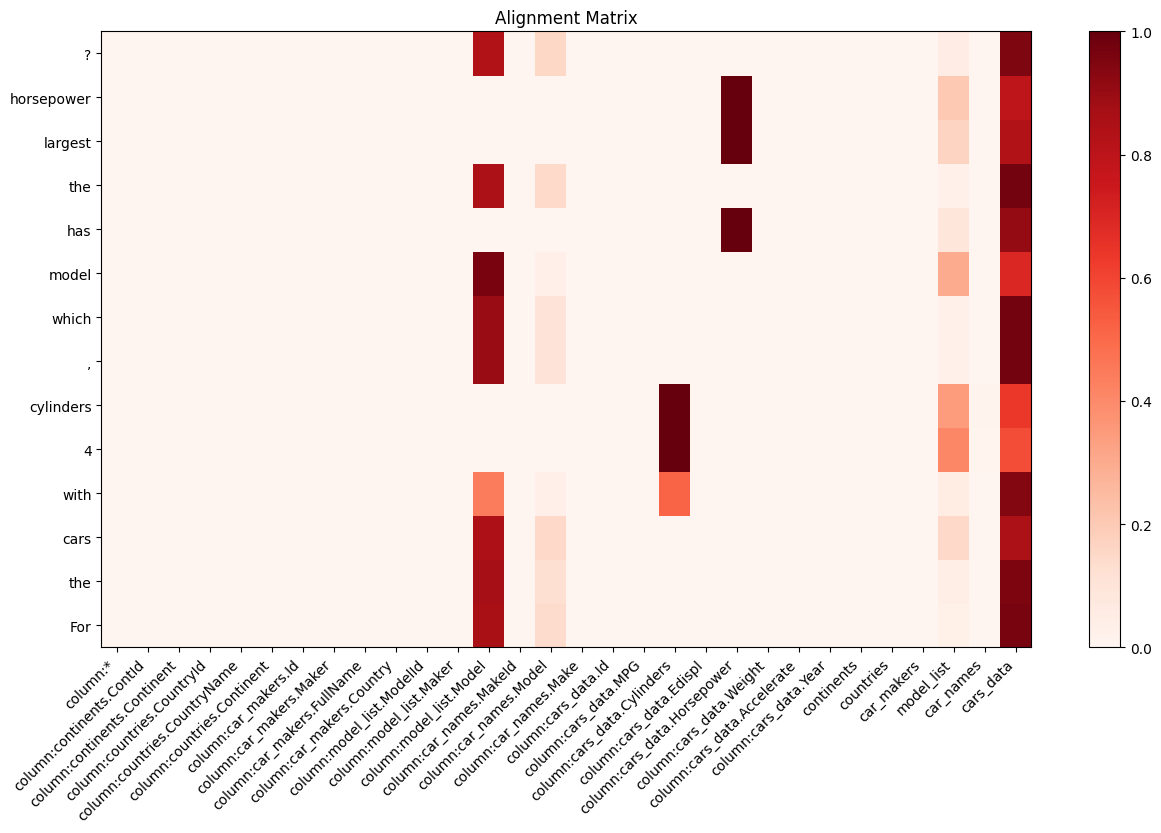

In [71]:
schema_list = list_cols + list_tables
generate_alignment_matrix_viz_spider(m2c_align_mat, m2t_align_mat, nl_tokens, schema_list)

In [64]:
def eval_exec_match(db, p_str, g_str, pred, gold):
    """
    return 1 if the values between prediction and gold are matching
    in the corresponding index. Currently not support multiple col_unit(pairs).
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()
    try:
        cursor.execute(p_str)
        p_res = cursor.fetchall()
    except:
        return False

    cursor.execute(g_str)
    q_res = cursor.fetchall()

    def res_map(res, val_units):
        rmap = {}
        for idx, val_unit in enumerate(val_units):
            key = tuple(val_unit[1]) if not val_unit[2] else (val_unit[0], tuple(val_unit[1]), tuple(val_unit[2]))
            rmap[key] = [r[idx] for r in res]
        return rmap

    p_val_units = [unit[1] for unit in pred['select'][1]]
    q_val_units = [unit[1] for unit in gold['select'][1]]
    return res_map(p_res, p_val_units) == res_map(q_res, q_val_units)